### This notebook is intended to plot hysteresis patterns for the SPRING of 2023 (similar formar as summer storm plotting code)

Import all data -  Constituents, water surface elevation (WSE) and sonde turbidity and fDOM to plot hysteresis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LinearRegression

# directory where the CSV files are stored
directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/Spring_2023'

# water depth data
depths = pd.read_csv(directory + '/2023_water_depths.csv', parse_dates=['Date_Time'], index_col='Date_Time')
# sonde data
down_sonde = pd.read_csv(directory + '/SP23_down_sonde.csv', parse_dates=['Date_Time'], index_col='Date_Time')
up_sonde = pd.read_csv(directory + '/SP23_up_sonde.csv', parse_dates=['Date_Time'], index_col='Date_Time')
# nutrient data
down_constituents = pd.read_csv(directory + '/SP23_down_constituents.csv', parse_dates=['Date_Time'], index_col='Date_Time')
up_constituents = pd.read_csv(directory + '/SP23_up_constituents.csv', parse_dates=['Date_Time'], index_col='Date_Time')

In [12]:
down_constituents

,WSE,Q,SS (uL/L),SRP (mg/L),TP (mg/L),DOC (mg/L),POC (mg/L),N (mg/L),PP (mg/L),LAB ID
Date_Time,,,,,,,,,,
2023-04-15 12:30:00,NaN,NaN,NaN,NaN,NaN,3.729,NaN,NaN,NaN,195
2023-04-15 16:30:00,NaN,NaN,NaN,NaN,NaN,3.573,NaN,NaN,NaN,196
2023-04-15 20:30:00,NaN,NaN,NaN,NaN,NaN,3.241,NaN,NaN,NaN,197
2023-04-16 00:30:00,NaN,NaN,NaN,NaN,NaN,3.202,NaN,NaN,NaN,198
2023-04-16 12:30:00,NaN,NaN,NaN,NaN,NaN,3.234,NaN,NaN,NaN,199
...,...,...,...,...,...,...,...,...,...,...
2023-05-04 11:00:00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,-
2023-05-04 02:00:00,NaN,NaN,0.00,NaN,NaN,2.933,NaN,NaN,NaN,353
2023-05-04 17:00:00,NaN,NaN,0.00,NaN,NaN,3.182,NaN,NaN,NaN,354


Plotting the raw turbidity and depth data

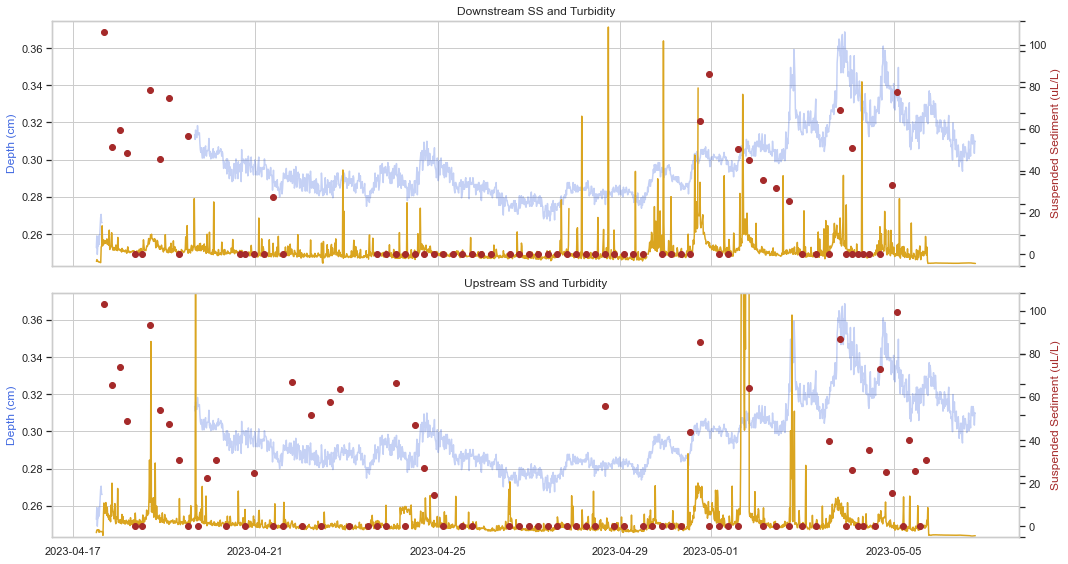

In [13]:
# getting min and max dates from turbidity data
min_date = min(down_sonde.index.min(), up_sonde.index.min())
max_date = max(down_sonde.index.max(), up_sonde.index.max())
# filter depth data
filtered_depths = depths.loc[(depths.index >= min_date) & (depths.index <= max_date)]

#plot depth time series for reach
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
sns.set_theme(style="whitegrid")
colors = ['royalblue', 'goldenrod', 'brown']
labels = ['Depth', 'Turbidity', 'Suspended Sediment']
ylabels = ['Depth (cm)', 'Turbidity (NTU)', 'Suspended Sediment (uL/L)']
data = [(down_sonde, down_constituents), (up_sonde, up_constituents)]
titles = ['Downstream SS and Turbidity', 'Upstream SS and Turbidity']

for i, (sonde, constituents) in enumerate(data):
    axes = [ax[i].twinx() if j > 0 else ax[i] for j in range(3)]
    for j, axis in enumerate(axes):
        if j == 0: # depth
            axis.plot(filtered_depths.index, filtered_depths['P3'], label=labels[j], color=colors[j], alpha=0.3)
            axis.grid(True)
            axis.set_ylabel(ylabels[j], color=colors[j])
        elif j == 1: # sonde
            axis.plot(sonde.index, sonde['Turbidity (NTU) (922381)'], label=labels[j], color=colors[j])
            axis.set_ylim(bottom=0, top=200)  # Set y-axis limits for turbidity
            axis.grid(False)
            axis.set_yticklabels([])
        else: # constituents
            axis.plot(constituents.index, constituents['SS (uL/L)'], 'o', label=labels[j], color=colors[j])
            axis.grid(False)
            axis.set_ylabel(ylabels[j], color=colors[j])
    ax[i].set_title(titles[i])

plt.tight_layout()
plt.show()

Cleanup turbidity and water depth Data

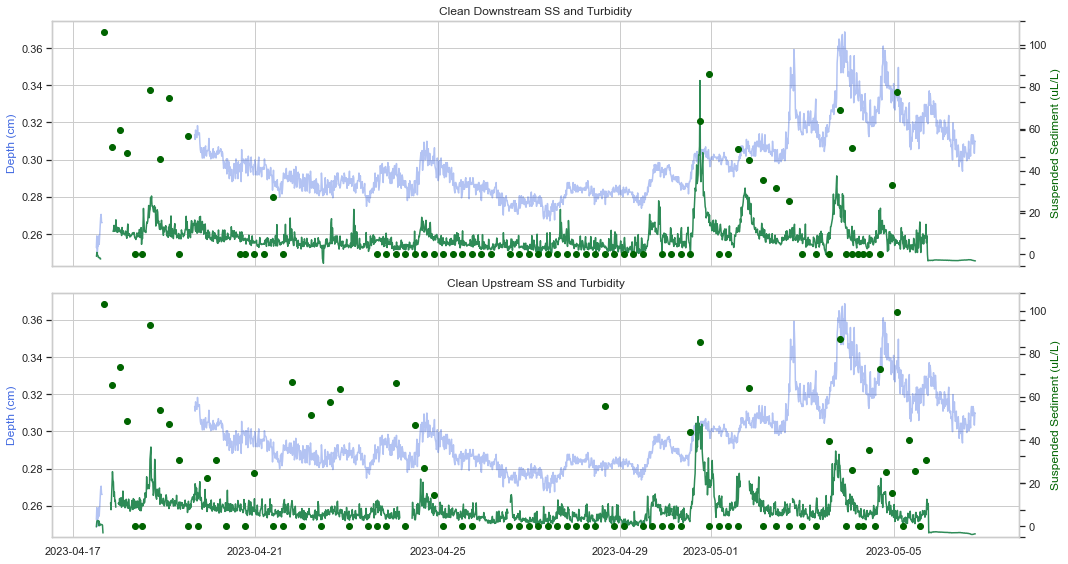

In [14]:
# after processing the data using Turbidity Cleaner Algorithm, import clean data and plot
down_sonde_clean = pd.read_csv(directory + '/post-turbidity-cleaner/SP23_down_clean_sondeturb.csv', parse_dates=['DateTime'], index_col='DateTime', na_values=-9999)
up_sonde_clean = pd.read_csv(directory + '/post-turbidity-cleaner/SP23_up_clean_sondeturb.csv', parse_dates=['DateTime'], index_col='DateTime', na_values=-9999)

# getting min and max dates from turbidity data
min_date = min(down_sonde_clean.index.min(), up_sonde_clean.index.min())
max_date = max(down_sonde_clean.index.max(), up_sonde_clean.index.max())
# filter depth data
filtered_depths = depths.loc[(depths.index >= min_date) & (depths.index <= max_date)]

#plot depth time series for reach
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
sns.set_theme(style="whitegrid")
colors = ['royalblue', 'seagreen', 'darkgreen']
labels = ['Depth', 'Turbidity', 'Suspended Sediment']
ylabels = ['Depth (cm)', 'Turbidity (NTU)', 'Suspended Sediment (uL/L)']
data = [(down_sonde_clean, down_constituents), (up_sonde_clean, up_constituents)]
titles = ['Clean Downstream SS and Turbidity', 'Clean Upstream SS and Turbidity']

for i, (sonde, constituents) in enumerate(data):
    axes = [ax[i].twinx() if j > 0 else ax[i] for j in range(3)]
    for j, axis in enumerate(axes):
        if j == 0: # depth
            axis.plot(filtered_depths.index, filtered_depths['P3'], label=labels[j], color=colors[j], alpha=0.4)
            axis.grid(True)
            axis.set_ylabel(ylabels[j], color=colors[j])
        elif j == 1: # sonde
            axis.plot(sonde.index, sonde['DataValue'], label=labels[j], color=colors[j])
            axis.set_ylim(bottom=0, top=90)  # Set y-axis limits for turbidity
            axis.grid(False)
            axis.set_yticklabels([])
        else: # constituents
            axis.plot(constituents.index, constituents['SS (uL/L)'], 'o', label=labels[j], color=colors[j])
            axis.grid(False)
            axis.set_ylabel(ylabels[j], color=colors[j])
    ax[i].set_title(titles[i])

plt.tight_layout()
plt.show()

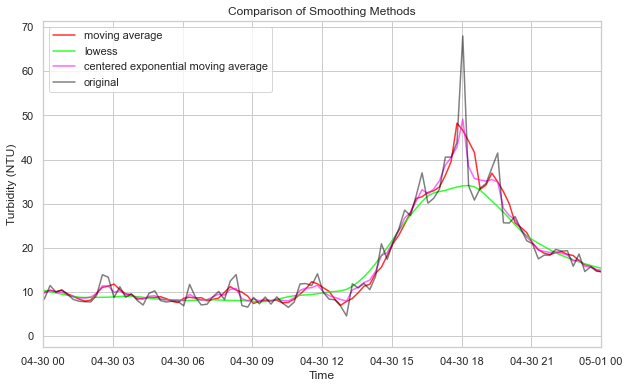

In [15]:
# trying out different smoothing techniques
# moving average
window_size = 4 # this is an hour (4 data points at a 15 minute frequency)
down_sonde_clean['MA_turbidity'] = down_sonde_clean['DataValue'].rolling(window=window_size, center=True).mean()

# lowess smoothing
from statsmodels.nonparametric.smoothers_lowess import lowess
frac = 0.009
down_sonde_clean['lowess_turbidity'] = lowess(down_sonde_clean['DataValue'], down_sonde_clean.index, frac=frac, return_sorted=False)

# exponential moving average
down_sonde_clean['EMA_turbidity'] = down_sonde_clean['DataValue'].ewm(span=window_size, adjust=False).mean()
ema_fwd = down_sonde_clean['DataValue'].ewm(span=window_size, adjust=False).mean() # forward EMA
ema_bwd = down_sonde_clean['DataValue'][::-1].ewm(span=window_size, adjust=False).mean() # backward EMA
centered_EMA = np.sqrt(ema_fwd * ema_bwd[::-1]) # centered EMA
down_sonde_clean['centered_EMA_turbidity'] = np.where(up_sonde_clean['DataValue'].isna(), np.nan, centered_EMA)


# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(down_sonde_clean.index, down_sonde_clean['MA_turbidity'], label='moving average', alpha=0.8, color='red')
plt.plot(down_sonde_clean.index, down_sonde_clean['lowess_turbidity'], label='lowess', alpha=0.8, color='lime')
plt.plot(down_sonde_clean.index, down_sonde_clean['centered_EMA_turbidity'], label='centered exponential moving average', alpha=0.6, color='magenta')
plt.plot(down_sonde_clean.index, down_sonde_clean['DataValue'], label='original', alpha=0.5, color='black')

# Set x-limits to April of the year in the data
plt.xlim([pd.Timestamp(year=int(down_sonde_clean.index.year[0]), month=4, day=30), pd.Timestamp(year=int(down_sonde_clean.index.year[0]), month=5, day=1)])

plt.title('Comparison of Smoothing Methods')
plt.xlabel('Time')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# the CEMA method seems to be the best smoothing method, and all peaks are captured accurately. 
std_dev = (down_sonde_clean['DataValue'] - down_sonde_clean['MA_turbidity']).std()
print('The standard deviation of the residuals for the moving average is:', round(std_dev, 3), 'NTU')

The standard deviation of the residuals for the moving average is: 1.587 NTU


In [17]:
# smoothing the rest of the data
# upstream turbidity data
ema_fwd = up_sonde_clean['DataValue'].ewm(span=window_size, adjust=False).mean() # forward EMA
ema_bwd = up_sonde_clean['DataValue'][::-1].ewm(span=window_size, adjust=False).mean() # backward EMA
centered_EMA = np.sqrt(ema_fwd * ema_bwd[::-1]) # centered EMA
up_sonde_clean['centered_EMA_turbidity'] = np.where(up_sonde_clean['DataValue'].isna(), np.nan, centered_EMA)

# depth data 
columns = ['P1', 'P2', 'P3']
for col in columns:
    ema_fwd = depths[col].ewm(span=window_size, adjust=False).mean() # forward EMA
    ema_bwd = depths[col][::-1].ewm(span=window_size, adjust=False).mean() # backward EMA
    centered_EMA = np.sqrt(ema_fwd * ema_bwd[::-1]) # centered EMA
    depths[f'{col}_EMA'] = np.where(depths[col].isna(), np.nan, centered_EMA)

Plotting the cleaned turbidity and water depth data 

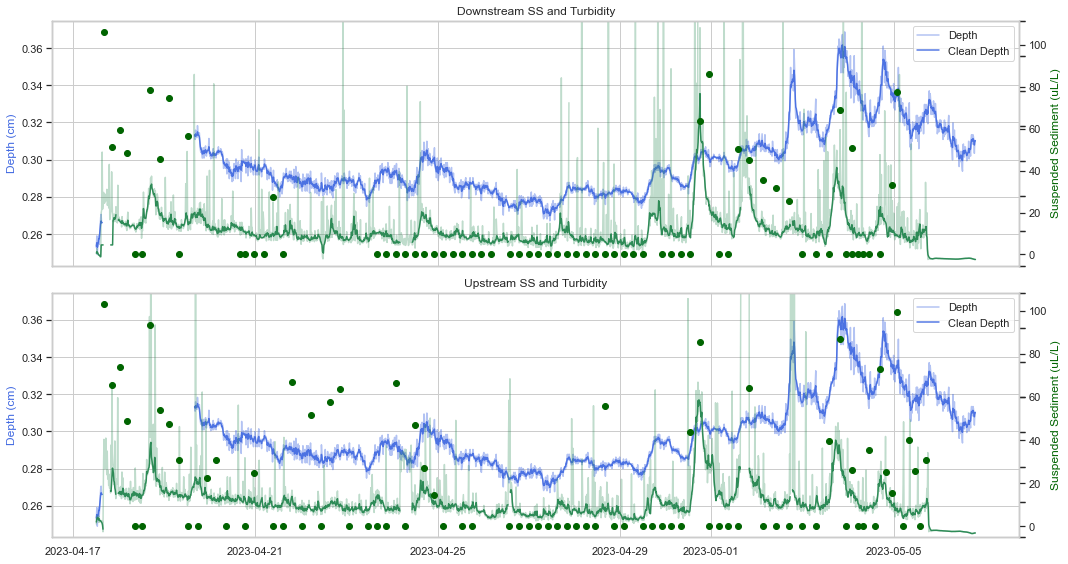

In [18]:
# getting min and max dates from turbidity data
min_date = min(down_sonde_clean.index.min(), up_sonde_clean.index.min())
max_date = max(down_sonde_clean.index.max(), up_sonde_clean.index.max())
# filter depth data (by dates)
filtered_depths = depths.loc[(depths.index >= min_date) & (depths.index <= max_date)]

#plot depth time series for reach
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
sns.set_theme(style="whitegrid")
colors = ['royalblue', 'seagreen', 'seagreen', 'darkgreen']
labels = ['Depth', 'Original Turbidity', 'Clean Turbidity','Suspended Sediment']
ylabels = ['Depth (cm)', 'Turbidity (NTU)', 'Turbidity (NTU)','Suspended Sediment (uL/L)']
data = [(down_sonde, down_sonde_clean, down_constituents), (up_sonde, up_sonde_clean, up_constituents)]
titles = ['Downstream SS and Turbidity', 'Upstream SS and Turbidity']

for i, (original_sonde, clean_sonde, constituents) in enumerate(data):
    axes = [ax[i].twinx() if j > 0 else ax[i] for j in range(4)]
    for j, axis in enumerate(axes):
        if j == 0: # depth
            axis.plot(filtered_depths.index, filtered_depths['P3'], label=labels[j], color=colors[j], alpha=0.4)
            axis.plot(filtered_depths.index, filtered_depths['P3_EMA'], label='Clean '+labels[j], color=colors[j], alpha=0.9)
            axis.grid(True)
            axis.set_ylabel(ylabels[j], color=colors[j])
        elif j == 1: # original sonde
            axis.plot(original_sonde.index, original_sonde['Turbidity (NTU) (922381)'], label=labels[j], color=colors[j], alpha=0.3)
            axis.set_ylim(bottom=0, top=70)  # Set y-axis limits for turbidity
            axis.grid(False)
            axis.set_yticklabels([])
        elif j == 2: # clean sonde
            axis.plot(clean_sonde.index, clean_sonde['centered_EMA_turbidity'], label='Clean '+labels[j], color=colors[j])
            axis.set_ylim(bottom=0, top=70)
            axis.grid(False)
            axis.set_yticklabels([])
        else: # constituents
            axis.plot(constituents.index, constituents['SS (uL/L)'], 'o', label=labels[j], color=colors[j])
            axis.grid(False)
            axis.set_ylabel(ylabels[j], color=colors[j])
    ax[i].set_title(titles[i])
    ax[i].legend()

plt.tight_layout()
plt.show()

Determination of high flow events - Downstream

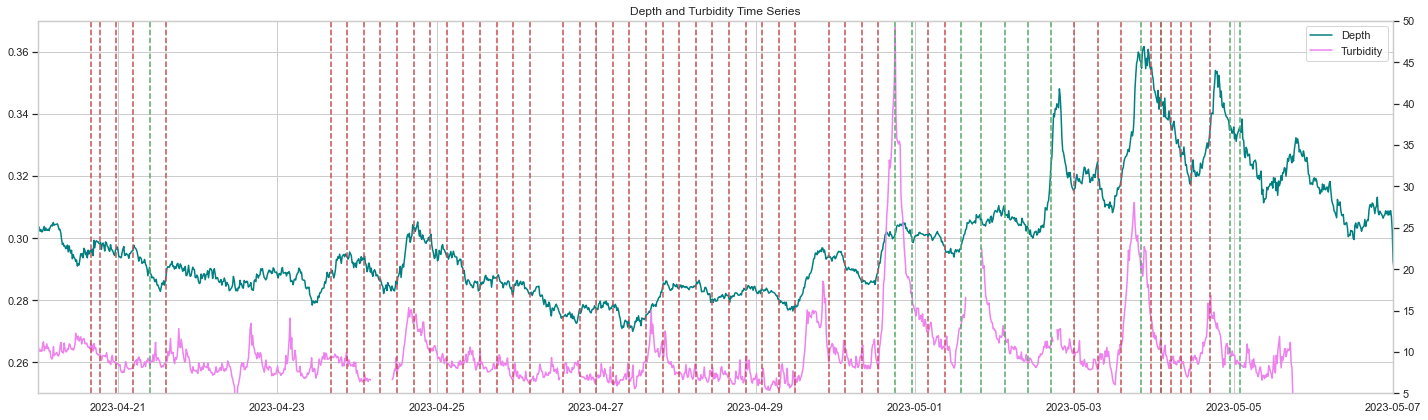

In [64]:
plt.figure(figsize=(20, 6))
line1, = plt.plot(depths.index, depths['P3_EMA'], color='teal', label='Depth')
plt.ylim([0.25, 0.37]) # set y-limits for water depth
ax = plt.gca().twinx() # twin axis for turbidity data
line2, = ax.plot(down_sonde_clean.index, down_sonde_clean['centered_EMA_turbidity'], color='violet', label='Turbidity')
ax.grid(False)
ax.set_ylim([5, 50] ) # set y-limits for turbidity
plt.title('Depth and Turbidity Time Series')

# Create a legend for the whole figure
plt.legend(handles=[line1, line2], labels=['Depth', 'Turbidity'])

for timestamp, value in down_constituents['SS (uL/L)'].items():
    if value != 0:
        plt.axvline(x=timestamp, color='g', linestyle='--')
    else:
        plt.axvline(x=timestamp, color='r', linestyle='--')

# Set x-limits to April of the year in the data
plt.xlim([pd.Timestamp(year=int(depths.index.year[0]), month=4, day=20, hour=0), pd.Timestamp(year=int(depths.index.year[0]), month=5, day=7, hour=0)])
#plt.savefig('depth_turbidity_time_series_apr30-may05.png')
#plt.savefig('SP23_event4.png')
plt.tight_layout()
plt.show()


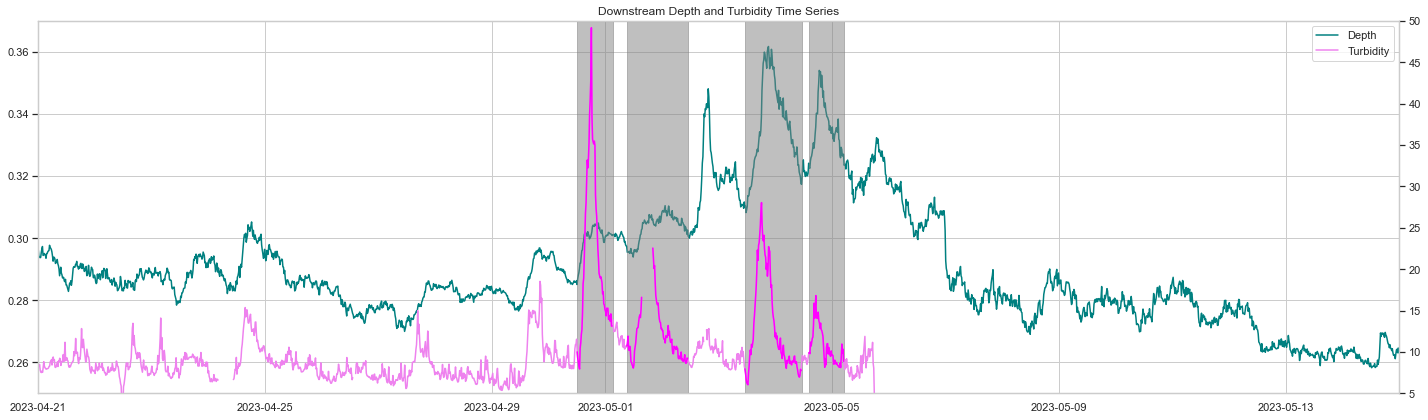

In [114]:
plt.figure(figsize=(20, 6))
line1, = plt.plot(depths.index, depths['P3_EMA'], color='teal', label='Depth')
plt.ylim([0.25, 0.37]) # set y-limits for water depth
ax = plt.gca().twinx() # twin axis for turbidity data
line2, = ax.plot(down_sonde_clean.index, down_sonde_clean['centered_EMA_turbidity'], color='violet', label='Turbidity')
ax.grid(False)
ax.set_ylim([5, 50] ) # set y-limits for turbidity
plt.title('Downstream Depth and Turbidity Time Series')

# Create a legend for the whole figure
plt.legend(handles=[line1, line2], labels=['Depth', 'Turbidity'])

# Set x-limits to April of the year in the data
plt.xlim([pd.Timestamp(year=int(depths.index.year[0]), month=4, day=21, hour=0), pd.Timestamp(year=int(depths.index.year[0]), month=5, day=15, hour=0)])

# List of high flow events (replace with your actual dates)
high_flow_events = [
    (pd.Timestamp('2023-04-30 12:00:00'), pd.Timestamp('2023-05-01 03:00:00')), #event 1
    (pd.Timestamp('2023-05-01 09:00:00'), pd.Timestamp('2023-05-02 11:00:00')), # event 2
    (pd.Timestamp('2023-05-03 11:00:00'), pd.Timestamp('2023-05-04 11:00:00')), # event 3
    (pd.Timestamp('2023-05-04 14:00:00'), pd.Timestamp('2023-05-05 05:00:00'))   # event 4
]

for start, end in high_flow_events:
    # Add shaded region
    plt.axvspan(start, end, color='grey', alpha=0.5)

    # Highlight depth and turbidity data
    line1, = plt.plot(depths.loc[start:end].index, depths.loc[start:end]['P3_EMA'], color='darkturquoise', label='Depth')
    line2, = ax.plot(down_sonde_clean.loc[start:end].index, down_sonde_clean.loc[start:end]['centered_EMA_turbidity'], color='magenta', label='Turbidity')

plt.tight_layout()
plt.savefig('SP23_downstream_events.png')
plt.show()

Determining high flow events - Upstream

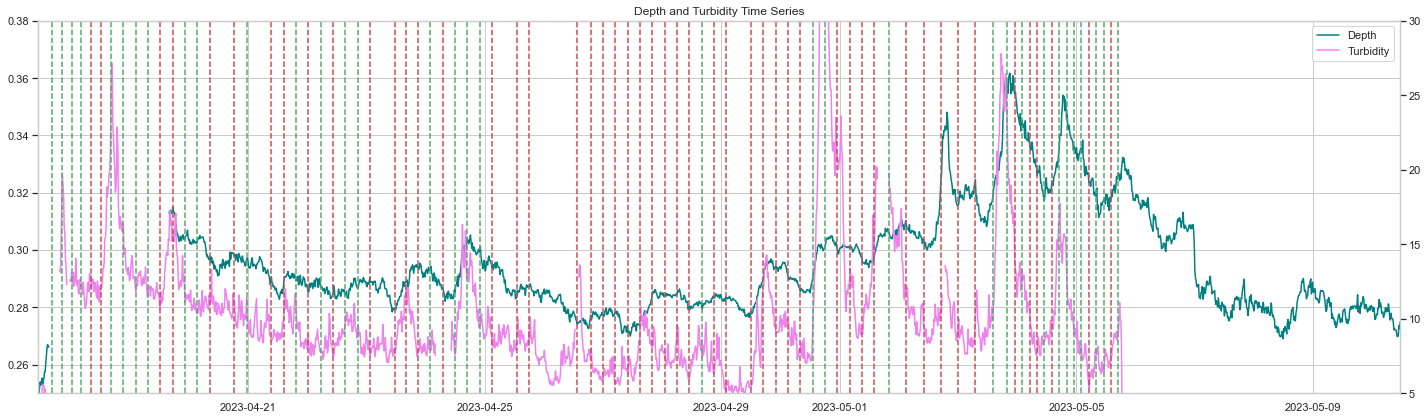

In [113]:
plt.figure(figsize=(20, 6))
line1, = plt.plot(depths.index, depths['P3_EMA'], color='teal', label='Depth')
plt.ylim([0.25, 0.38]) # set y-limits for water depth
ax = plt.gca().twinx() # twin axis for turbidity data
line2, = ax.plot(up_sonde_clean.index, up_sonde_clean['centered_EMA_turbidity'], color='violet', label='Turbidity')
ax.grid(False)
ax.set_ylim([5, 30] ) # set y-limits for turbidity
plt.title('Depth and Turbidity Time Series')

# Create a legend for the whole figure
plt.legend(handles=[line1, line2], labels=['Depth', 'Turbidity'])

for timestamp, value in up_constituents['SS (uL/L)'].items():
    if value != 0:
        plt.axvline(x=timestamp, color='g', linestyle='--')
    else:
        plt.axvline(x=timestamp, color='r', linestyle='--')

# Set x-limits to April of the year in the data
plt.xlim([pd.Timestamp(year=int(depths.index.year[0]), month=4, day=17, hour=11), pd.Timestamp(year=int(depths.index.year[0]), month=5, day=10, hour=11)])
#plt.savefig('up_depth_turbidity_time_series_apr25-30.png')
#plt.savefig('SP23_event3_up.png')
plt.tight_layout()
plt.show()

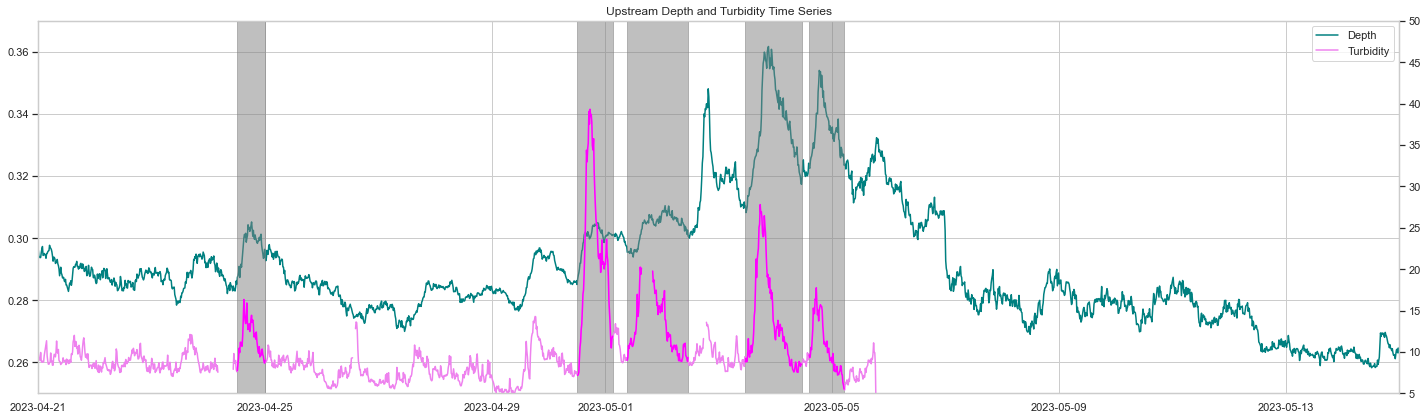

In [117]:
plt.figure(figsize=(20, 6))
line1, = plt.plot(depths.index, depths['P3_EMA'], color='teal', label='Depth')
plt.ylim([0.25, 0.37]) # set y-limits for water depth
ax = plt.gca().twinx() # twin axis for turbidity data
line2, = ax.plot(up_sonde_clean.index, up_sonde_clean['centered_EMA_turbidity'], color='violet', label='Turbidity')
ax.grid(False)
ax.set_ylim([5, 50] ) # set y-limits for turbidity
plt.title('Upstream Depth and Turbidity Time Series')

# Create a legend for the whole figure
plt.legend(handles=[line1, line2], labels=['Depth', 'Turbidity'])

# Set x-limits to April of the year in the data
plt.xlim([pd.Timestamp(year=int(depths.index.year[0]), month=4, day=21, hour=0), pd.Timestamp(year=int(depths.index.year[0]), month=5, day=15, hour=0)])

# List of high flow events (replace with your actual dates)
high_flow_events = [
    (pd.Timestamp('2023-04-24 12:00:00'), pd.Timestamp('2023-04-25 00:00:00')), #event 0
    (pd.Timestamp('2023-04-30 12:00:00'), pd.Timestamp('2023-05-01 03:00:00')), #event 1
    (pd.Timestamp('2023-05-01 09:00:00'), pd.Timestamp('2023-05-02 11:00:00')), # event 2
    (pd.Timestamp('2023-05-03 11:00:00'), pd.Timestamp('2023-05-04 11:00:00')), # event 3
    (pd.Timestamp('2023-05-04 14:00:00'), pd.Timestamp('2023-05-05 05:00:00'))   # event 4
]

for start, end in high_flow_events:
    # Add shaded region
    plt.axvspan(start, end, color='grey', alpha=0.5)

    # Highlight depth and turbidity data
    line1, = plt.plot(depths.loc[start:end].index, depths.loc[start:end]['P3_EMA'], color='darkturquoise', label='Depth')
    line2, = ax.plot(up_sonde_clean.loc[start:end].index, up_sonde_clean.loc[start:end]['centered_EMA_turbidity'], color='magenta', label='Turbidity')

plt.tight_layout()
plt.savefig('SP23_upstream_events.png')
plt.show()